# Spam Text Message Classification

**Objetivo:** Construir un clasificador de Spam con "Recurrent Nerual Networks" y "Long short-term memory" RNN and LSTM.


Cargamos las librerías que nos ayudarán a cumplir el objetivo.

In [1]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Para cumplir nuestro objetivo tenemos dos conjuntos de datos que se relacionan con el "ID", los cuales se pueden encontrar en: https://www.kaggle.com/team-ai/spam-text-message-classification.

- **SPAM text message 20170820 - Data.** Tiene la información del texto, las variables que tiene son:
    - Category: Identificado si el texto es 'ham' o 'spam'.
    - Message: El texto

In [2]:
data = pd.read_csv("input/SPAM text message 20170820 - Data.csv")

## Extracción de características
Creamos los arreglos con los textos y etiquetas separadas, donde las etiquetas serían 1 en caso de ser 'spam' y 0 si es 'ham'.

In [3]:
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)

Hacemos una limpieza de los textos.

In [4]:
max_features = 10000
maxlen = 500

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Encontramos {0} palabras únicas: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

Encontramos 9004 palabras únicas: 


Separamos el conjunto en datos de entranemiento y prueba.

In [5]:
np.random.seed(42)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

X_train, X_test, y_train, y_test = train_test_split(data,labels, 
                                                    stratify=labels, test_size=0.2,
                                                    random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, 
                                                    stratify=y_train, test_size=0.2,
                                                    random_state = 0)

## Entrenamiento
### Ren Neuronal Recurente (simple)

In [6]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history_rnn = model.fit(X_train,
                        y_train, 
                        epochs=10,
                        batch_size=60, 
                        validation_data = (X_val, y_val))

Train on 3565 samples, validate on 892 samples
Epoch 1/10
3565/3565 [==============================] - 13s 4ms/sample - loss: 0.4407 - accuracy: 0.8533 - val_loss: 0.2454 - val_accuracy: 0.9182
Epoch 2/10
3565/3565 [==============================] - 12s 3ms/sample - loss: 0.1412 - accuracy: 0.9677 - val_loss: 0.0915 - val_accuracy: 0.9798
Epoch 3/10
3565/3565 [==============================] - 12s 3ms/sample - loss: 0.3456 - accuracy: 0.8429 - val_loss: 0.3133 - val_accuracy: 0.86550.3308 - accuracy
Epoch 4/10
3565/3565 [==============================] - 12s 3ms/sample - loss: 0.3004 - accuracy: 0.8682 - val_loss: 0.1421 - val_accuracy: 0.9652
Epoch 5/10
3565/3565 [==============================] - 12s 3ms/sample - loss: 0.1130 - accuracy: 0.9661 - val_loss: 0.1035 - val_accuracy: 0.9765
Epoch 6/10
3565/3565 [==============================] - 12s 3ms/sample - loss: 0.0494 - accuracy: 0.9871 - val_loss: 0.0598 - val_accuracy: 0.9832
Epoch 7/10
3565/3565 [==============================] 

Visualizamos las métricas del entrenamiento.

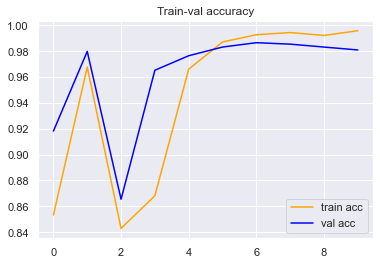

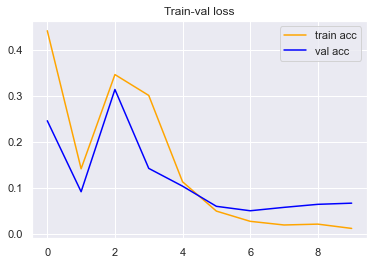

In [8]:
acc = history_rnn.history['accuracy']
val_acc = history_rnn.history['val_accuracy']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='train acc')
plt.plot(epochs, val_acc, '-', color='blue', label='val acc')
plt.title('Train-val accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='train acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='val acc')
plt.title('Train-val loss')
plt.legend()
plt.show()

Calculamos la eficiencia en el conjunto de pruebas.

In [9]:
pred = model.predict_classes(X_test)
acc = model.evaluate(X_test, y_test)
proba_ltsm = model.predict_proba(X_test)
print("Test loss: {0:.2f} accuracy:{1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

1115/1115 [==============================] - 1s 1ms/sample - loss: 0.0751 - accuracy: 0.9776
Test loss: 0.08 accuracy:0.98  
[[958  17]
 [  8 132]]


### RNN Long short-term memory (LSTM)

In [10]:
del model 

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history_ltsm = model.fit(X_train,
                        y_train, 
                        epochs=10,
                        batch_size=60, 
                        validation_data = (X_val, y_val))

Train on 3565 samples, validate on 892 samples
Epoch 1/10
3565/3565 [==============================] - 4s 1ms/sample - loss: 0.3251 - accuracy: 0.8839 - val_loss: 0.1586 - val_accuracy: 0.9731
Epoch 2/10
3565/3565 [==============================] - 1s 407us/sample - loss: 0.1107 - accuracy: 0.9773 - val_loss: 0.0809 - val_accuracy: 0.9832
Epoch 3/10
3565/3565 [==============================] - 2s 422us/sample - loss: 0.0621 - accuracy: 0.9865 - val_loss: 0.0578 - val_accuracy: 0.9888
Epoch 4/10
3565/3565 [==============================] - 2s 439us/sample - loss: 0.0401 - accuracy: 0.9913 - val_loss: 0.0484 - val_accuracy: 0.9877
Epoch 5/10
3565/3565 [==============================] - 1s 419us/sample - loss: 0.0263 - accuracy: 0.9938 - val_loss: 0.0637 - val_accuracy: 0.9843
Epoch 6/10
3565/3565 [==============================] - 1s 415us/sample - loss: 0.0171 - accuracy: 0.9961 - val_loss: 0.0495 - val_accuracy: 0.9854
Epoch 7/10
3565/3565 [==============================] - 2s 424us/sa

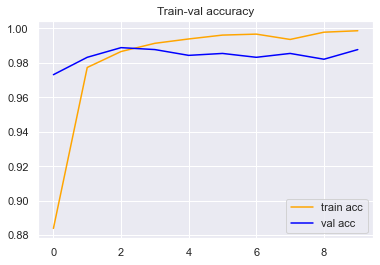

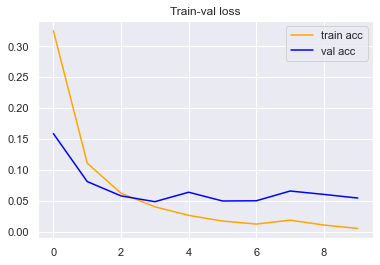

In [12]:
acc = history_ltsm.history['accuracy']
val_acc = history_ltsm.history['val_accuracy']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='train acc')
plt.plot(epochs, val_acc, '-', color='blue', label='val acc')
plt.title('Train-val accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='train acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='val acc')
plt.title('Train-val loss')
plt.legend()
plt.show()

In [13]:
pred = model.predict_classes(X_test)
acc = model.evaluate(X_test, y_test)
proba_ltsm = model.predict_proba(X_test)
print("Test loss: {0:.2f} accuracy:{1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

1115/1115 [==============================] - 0s 278us/sample - loss: 0.0452 - accuracy: 0.9892
Test loss: 0.05 accuracy:0.99  
[[961   7]
 [  5 142]]


Vemos como el LTS tiene mejores resultados

## Conclusiones y Recomendaciones

- Es posible el crear un clasificador de Spam con "Recurrent Nerual Networks" y "Long short-term memory" RNN and LSTM, ya que aunque el dataset no tenia muchas complicaciones los resltados son bastante altos sobre textos no vistos.
- Se pueden utilizar ambas redes neuronales en algún tipo de acoplamiento para mejorar la precisión ya que ambas tuvieron buenos resultados.